### Phase 3 Project Submission
* Students name: Jeniffer Njeri Gatharia
* Student pace: Part Time
* Instructor name: Samuel G Mwangi

# SyriaTel Customer Churn

## Project Overview

### 1. Business Understanding

Customer retention is at the heart of every thriving Telecom company. Managing and reducing customer churn is essential for maintaining revenue, profitability, and market share. By focusing on churn reduction, telecom companies can enhance customer satisfaction, increase the lifetime value of their customers, and secure a stronger position in the competitive market. SyriaTelecommunication is well aware of the common marketplace comment that "it is cheaper to retain a converted customer than acquire a new client. As a result, I have been tasked to build a classification model that will predict whether a customer will soon stop doing business with them. 

The research at hand delves into machine learning algorithms and offers recommendations tailored to the telecommunications industry. In a competitive telecom sector where customers can effortlessly switch from one provider to another, telecom companies are understandably concerned about customer retention and devising strategies to retain their clientele. By preemptively identifying customers likely to switch providers through behavioral analysis, they can devise targeted offers and services based on historical records. 

The core objective of this study is to predict churn in advance and pinpoint the primary factors that may influence customers to migrate to other telecom providers. The project will explore various machine learning algorithms, including logistic regression and decision trees to develop a robust churn prediction model. Model performance will be evaluated using metrics such as accuracy, precision, recall, and AUC-ROC to ensure the best possible outcomes. This will provide the insight the board members need when making policies and procedures that will enable the business gear towards retaining the customers and continue being relevant in the marketplace.

See below questions the project aims to answer:
1. What is the churn current % rate.
2. What are the factors contributing to customer churn.
3. What features/attributes do the customers who churn have.
4. What strategies can SyriaTel implement to increase customer retention.

### 2. Data Understanding

This project utilizes the SyriaTel dataset, which was downloaded from Kaggle. The data is stored in the file named SyriaTel_Customer_Churn.csv. As part of understanding our data, we will assess it for class imbalance and identify any other potential limitations. These issues will be addressed as we proceed to analyze and prepare the data for modeling.

See below columns and what they represent:
* State: The geographical location of the customer.
* Account Length: How long the customer held their account.
* Area Code: Customer's phone number area code.
* Phone Number: Customer's mobile number.
* International Plan: A indicator of whether the customer has an international plan or not.
* Voice Mail Plan: An indicator whether the customer has a voice mail plan.
* Number Vmail Messages: How many voicemail messages the customer has.
* Total Day Minutes: Total minutes the customers spend on a call in the day.
* Total Day Calls: Total number of calls the customer made in a day.
* Total Day Charge: Total charge incrued for the day calls.
* Total Eve Minutes: Total minutes the customers spend on a call in the evening.
* Total Eve Calls: Total number of calls the customer made in a evening.
* Total Eve Charge: Total charge incrued for the evening calls
* Total Night Minutes: Total minutes the customers spend on a call in the night.
* Total Night Calls: Total number of calls the customer made in a night.
* Total Night Charge: Total charge incrued for the day night.
* Total Intl Minutes: Total minutes spent on an international call.
* Total Intl Calls: Total international calls made.
* Total Intl Charge: Total charge incured on the international plan.
* Customer Service Calls: How many calls the customer made for support to SyriaTel.
* Churn: Target variable indicating whether the customer has churned or not that is 1 or 0 respectively.

All the other features are potential contributing factors to churn which our project will focus on to eventually tell which features are more significant than the others. 



### 3. Data Preparation 
#### Import relevant libraries

In [3]:
import pandas as pd
import numpy as np
#libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree


#### Data Overview

In [4]:
# Load the data and view the first 5 rows
customer_churn = pd.read_csv('SyriaTel_Customer_Churn.csv')
customer_churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# To check the Shape of the dataset
customer_churn.shape

(3333, 21)

* We note the dataset has 3333 rows and 21 columns

In [6]:
# To view the dataset info
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* From the information seen above we note the dtypes of the various columns bool(1), float64(8), int64(8) and object(4)
* We also note that we do not have any missing values here from the non-null count.


In [21]:
#To check the column names
customer_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
#To view the descriptive statistic of the dataset
customer_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### To check for missing values

In [9]:
#To check for missing values
customer_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

* This is just another step where we confirm that the dataset has no missing values.

#### Target variable class distribution

False    2850
True      483
Name: churn, dtype: int64


False    85.508551
True     14.491449
Name: churn, dtype: float64


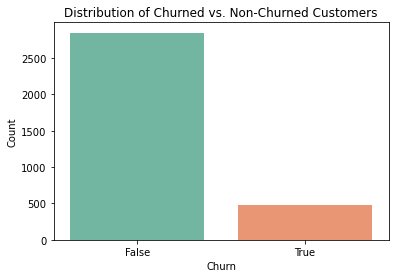

In [22]:
class_distribution = customer_churn['churn'].value_counts()
print(class_distribution)

print('\n')
#To view the % distribution      
class_distribution = customer_churn['churn'].value_counts(normalize=True) * 100
print(class_distribution)

#Visualization of the Churned Vs. Non-Churned Customers
sns.countplot(x='churn', data=customer_churn, palette='Set2')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* From the target variable above we see that the churn class value count is 483 whereas the no churn count is 2850. We note a significant class imbalance here where the churn is the minority class and not churn is the majority class. This is common in churn datasets.

* 85.5% customer did not churn while 14.5% customers churned. The imbalance means that a model trained without addressing this issue will be biased toward predicting the majority class (customers not churning). This will lead to high accuracy but poor performance in identifying actual churners.

* We will address class imbalance using a technique such as SMOTE before modeling to balance the 'churn' and 'not churn' classes. This should help improve overall model metrics like Precision, Recall, F1-score, and AUC-ROC. In imbalanced datasets, a model may achieve high accuracy by being biased toward the majority class, but this metric alone would be misleading and not truly reflective of the model's performance on the minority class which is what our model is meant to predict